In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	1
float64		column 3	1
float64		column 4	1
float64		column 5	1
float64		column 6	5
float64		column 7	6
float64		column 8	2
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,213.000000,213.000000,213.000000,213.000000,213.000000,209.000000,208.000000,212.000000,214.000000
mean,1.518380,13.389202,2.697136,1.445775,72.653897,0.497464,8.938798,0.176698,0.057009
std,0.003037,0.771501,1.433946,0.500284,0.775154,0.659288,1.369386,0.499277,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516530,12.900000,2.190000,1.190000,72.280000,0.120000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519160,13.810000,3.600000,1.630000,73.090000,0.610000,9.157500,0.000000,0.100000
max,1.533930,15.790000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

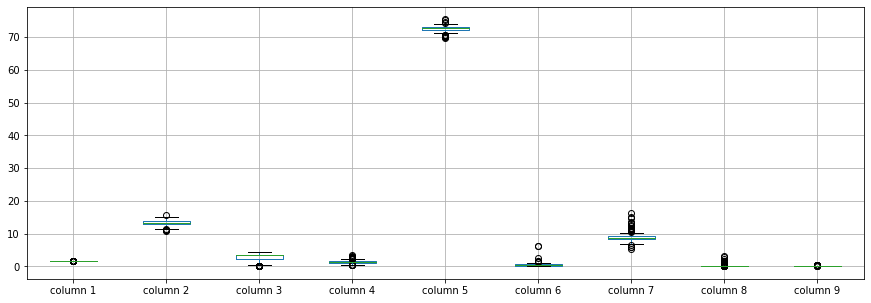

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518380
column 2    13.389202
column 3     2.697136
column 4     1.445775
column 5    72.653897
column 6     0.497464
column 7     8.938798
column 8     0.176698
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.142378,-0.132508,-0.403982,-0.542401,-0.291759,0.798789,0.003555,0.140683
column 2,-0.142378,1.000000,-0.238627,0.222172,-0.170246,-0.262025,-0.260784,0.354829,-0.242011
column 3,-0.132508,-0.238627,1.000000,-0.470437,-0.171228,-0.007354,-0.441156,-0.488204,0.078631
column 4,-0.403982,0.222172,-0.470437,1.000000,-0.010755,0.324234,-0.257643,0.480131,-0.075510
column 5,-0.542401,-0.170246,-0.171228,-0.010755,1.000000,-0.196567,-0.186188,-0.104221,-0.096678
column 6,-0.291759,-0.262025,-0.007354,0.324234,-0.196567,1.000000,-0.323163,-0.043125,-0.005980
column 7,0.798789,-0.260784,-0.441156,-0.257643,-0.186188,-0.323163,1.000000,-0.114928,0.132846
column 8,0.003555,0.354829,-0.488204,0.480131,-0.104221,-0.043125,-0.114928,1.000000,-0.059531
column 9,0.140683,-0.242011,0.078631,-0.075510,-0.096678,-0.005980,0.132846,-0.059531,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+23,9+23+23,9+23+23+23,9+23+23+23+23,9+23+23+23+23+23,9+23+23+23+23+23+23,9+23+23+23+23+23,9+23+23+23+23,9+23+23+23,9+23+23,9+23,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=56)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 101.74460132305438
Epoch: 1 , loss: 101.74715599646935
Epoch: 2 , loss: 101.6993889441857
Epoch: 3 , loss: 101.7673333974985
Epoch: 4 , loss: 101.63506786639874
Epoch: 5 , loss: 101.68074094332181
Epoch: 6 , loss: 101.66442284217247
Epoch: 7 , loss: 101.61754842904898
Epoch: 8 , loss: 101.6466310941256
Epoch: 9 , loss: 101.62216127835788
Epoch: 10 , loss: 101.55836604191707
Epoch: 11 , loss: 101.57909393310547
Epoch: 12 , loss: 101.58914360633263
Epoch: 13 , loss: 101.59086491511418
Epoch: 14 , loss: 101.5480229304387
Epoch: 15 , loss: 101.5918702345628
Epoch: 16 , loss: 101.58884899432843
Epoch: 17 , loss: 101.58203829251804
Epoch: 18 , loss: 101.64217963585487
Epoch: 19 , loss: 101.53413508488582
Epoch: 20 , loss: 101.6139162503756
Epoch: 21 , loss: 101.67071181077223
Epoch: 22 , loss: 101.71769068791316
Epoch: 23 , loss: 101.59307039701022
Epoch: 24 , loss: 101.61810067983774
Epoch: 25 , loss: 101.57

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(77.94833336707899, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.07148364019819353

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_AW_1(imp).xlsx", index=False, header=False)